In [2]:
from Processing.data_handler import DataProcessor, DataProcessor_Ball
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def plot_PID_comparison(df):
    time_vals = df["CurrTime"]
    time_vals = time_vals - time_vals.iloc[0]
    rpm_vals = df["CurrRpm"]
    set_rpm = df["SetRpm"]
    plt.plot(time_vals, rpm_vals)
    plt.plot(time_vals, set_rpm)
    plt.title("Detected Rpm vs Set Rpm")
    plt.xlabel("Time in Seconds from Start Up")
    plt.ylabel("RPM")

def plot_loop_closure_times_wheel(df):
    time_vals = df["CurrTime"]
    time_vals = time_vals - time_vals.iloc[0]
    loop_vals = df["LoopTimes"]
    plt.plot(time_vals, loop_vals)
    plt.title("Detected Rpm vs Set Rpm")
    plt.xlabel("Time in Seconds from Start Up")
    plt.ylabel("Loop Times in S")

def plot_loop_closure_times_ball(df):
    time_vals = df["CurrTime"]
    time_vals = time_vals - time_vals.iloc[0]
    loop_vals = df["LoopTimes"]
    plt.plot(time_vals, loop_vals)
    plt.title("Detected Rpm vs Set Rpm")
    plt.xlabel("Time in Seconds from Start Up")
    plt.ylabel("Loop Times in S")

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

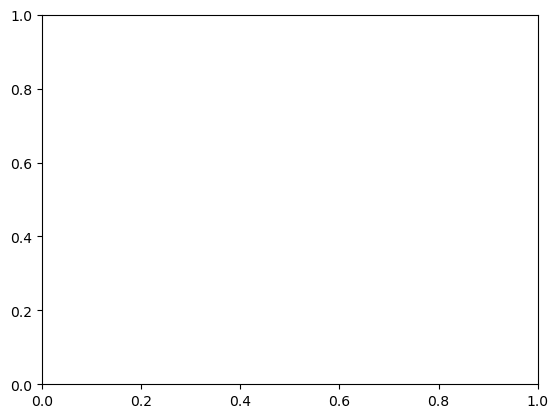

In [4]:
data_processor = DataProcessor()
last_log = data_processor.get_last_log()
df = data_processor.get_last_frame()
headers = data_processor.get_headers(df)

plot_PID_comparison(df)

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

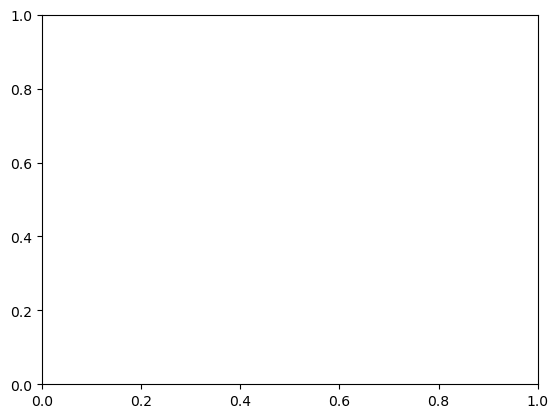

In [6]:
plot_loop_closure_times_wheel(df)

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

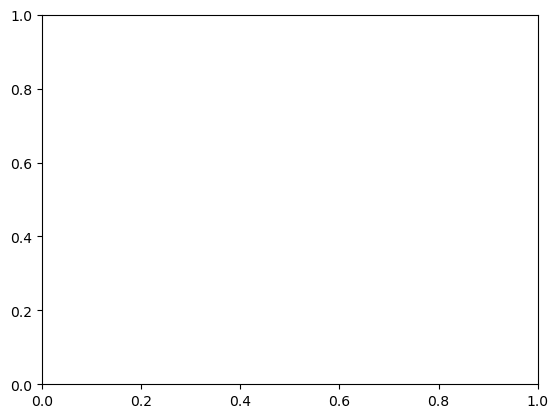

In [9]:
data_processor_ball = DataProcessor_Ball()
last_log = data_processor_ball.get_last_log()
df = data_processor_ball.get_last_frame()
headers = data_processor_ball.get_headers(df)
plot_loop_closure_times_ball(df)